## Ensemble Learning and Random Forest

### What is Ensemble learning ?
**Ensemble learning** is a technique in machine learning where multiple models (called *base learners*) are combined to produce a more powerful and robust predictive model. This approach leans on the idea of **"wisdom of the crowd"**, where a group decision often outperforms individual experts.

### 🔁 Why Use Ensembles?
- Reduces overfitting
- Improves accuracy
- Handles noisy data more gracefully

## 🌲 Random Forest: An Ensemble of Decision Trees

**Random Forest** is a popular ensemble method that builds a collection of Decision Trees and combines their outputs to make a final prediction.

### How It Works:
1. Each tree is trained on a **random subset of the training data** (bootstrapping).
2. At each split, the tree chooses from a **random subset of features**.
3. For classification tasks, trees vote and the **majority vote** is selected.
4. For regression tasks, predictions are averaged.

### Key Benefits:
- Better generalization than a single Decision Tree
- Handles high-dimensional datasets
- Resistant to overfitting
---

### Voting Classifier 
let's assume we have trained a few classsifiers , each one achieving about 80%  accuracy.
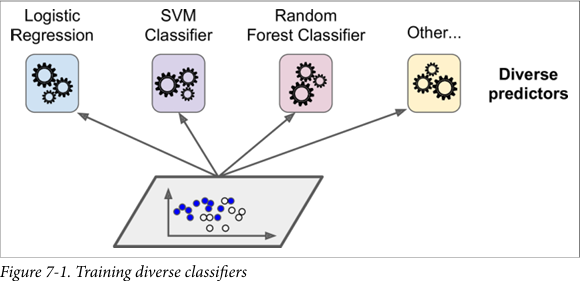

To create a better classifier is to aggregate the predicitons of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.

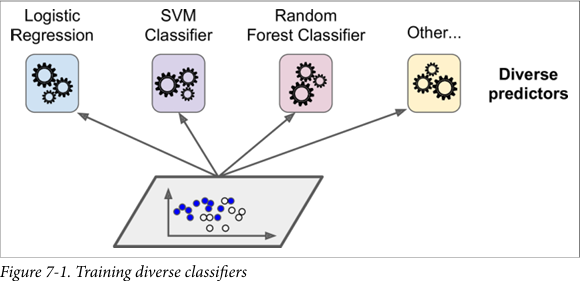

Ensemble methods work best when the predictors are as independ
ent from one another as possible. One way to get diverse classifiers
 is to train them using very different algorithms. This increases the
 chance that they will make very different types of errors, improving
 the ensemble’s accuracy.


In [28]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42,probability=True))
    ], voting= 'soft'
)
voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [29]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.92
